In [19]:
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from PIL import Image

data_dir = '/data/sop/'

In [20]:
images = glob.glob(data_dir + "**/*.JPG", recursive=True)
len(images)

120053

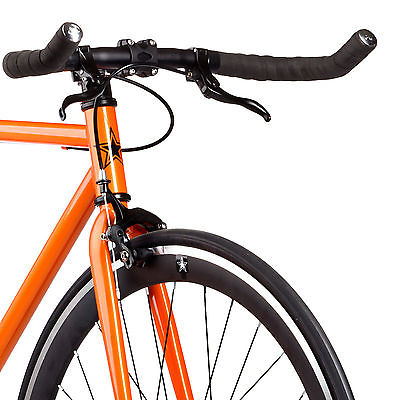

In [21]:
img = Image.open(random.choice(images))
img

In [22]:
!ls $data_dir

Ebay_final.txt	bicycle_final.txt	kettle_final.txt   test.paquet
Ebay_info.txt	cabinet_final.txt	lamp_final.txt	   toaster_final.txt
Ebay_test.txt	chair_final.txt		mug_final.txt	   train.paquet
Ebay_train.txt	coffee_maker_final.txt	sofa_final.txt
LICENSE		fan_final.txt		stapler_final.txt
README		images			table_final.txt


In [23]:
col_map = {'path': 'image', "image_id": "id"}
train_df = pd.read_csv(data_dir + "Ebay_train.txt", sep=" ")
train_df.rename(columns=col_map, inplace=True)
train_df

,id,class_id,super_class_id,image
0,1,1,1,bicycle_final/111085122871_0.JPG
1,2,1,1,bicycle_final/111085122871_1.JPG
2,3,1,1,bicycle_final/111085122871_2.JPG
3,4,1,1,bicycle_final/111085122871_3.JPG
4,5,1,1,bicycle_final/111085122871_4.JPG
...,...,...,...,...
59546,59547,11318,12,toaster_final/221852410489_0.JPG
59547,59548,11318,12,toaster_final/221852410489_1.JPG
59548,59549,11318,12,toaster_final/221852410489_2.JPG
59549,59550,11318,12,toaster_final/221852410489_3.JPG


In [24]:
test_df = pd.read_csv(data_dir + "Ebay_test.txt", sep=" ")
test_df.rename(columns=col_map, inplace=True)
test_df

,id,class_id,super_class_id,image
0,59552,11319,1,bicycle_final/251952414262_0.JPG
1,59553,11319,1,bicycle_final/251952414262_1.JPG
2,59554,11319,1,bicycle_final/251952414262_2.JPG
3,59555,11319,1,bicycle_final/251952414262_3.JPG
4,59556,11319,1,bicycle_final/251952414262_4.JPG
...,...,...,...,...
60497,120049,22633,12,toaster_final/400977584616_1.JPG
60498,120050,22634,12,toaster_final/400977722713_0.JPG
60499,120051,22634,12,toaster_final/400977722713_1.JPG
60500,120052,22634,12,toaster_final/400977722713_2.JPG


In [25]:
len(np.intersect1d(train_df.class_id, test_df.class_id))

0

In [26]:
train_df["category"] = train_df.image.str.split('/').str[0]
test_df["category"] = test_df.image.str.split('/').str[0]
train_df

,id,class_id,super_class_id,image,category
0,1,1,1,bicycle_final/111085122871_0.JPG,bicycle_final
1,2,1,1,bicycle_final/111085122871_1.JPG,bicycle_final
2,3,1,1,bicycle_final/111085122871_2.JPG,bicycle_final
3,4,1,1,bicycle_final/111085122871_3.JPG,bicycle_final
4,5,1,1,bicycle_final/111085122871_4.JPG,bicycle_final
...,...,...,...,...,...
59546,59547,11318,12,toaster_final/221852410489_0.JPG,toaster_final
59547,59548,11318,12,toaster_final/221852410489_1.JPG,toaster_final
59548,59549,11318,12,toaster_final/221852410489_2.JPG,toaster_final
59549,59550,11318,12,toaster_final/221852410489_3.JPG,toaster_final


<AxesSubplot:>

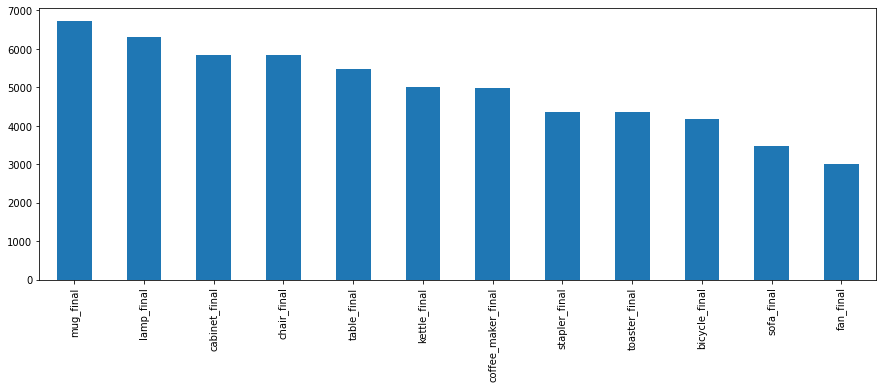

In [27]:
train_df.category.value_counts().plot.bar(figsize=(15, 5))

<AxesSubplot:>

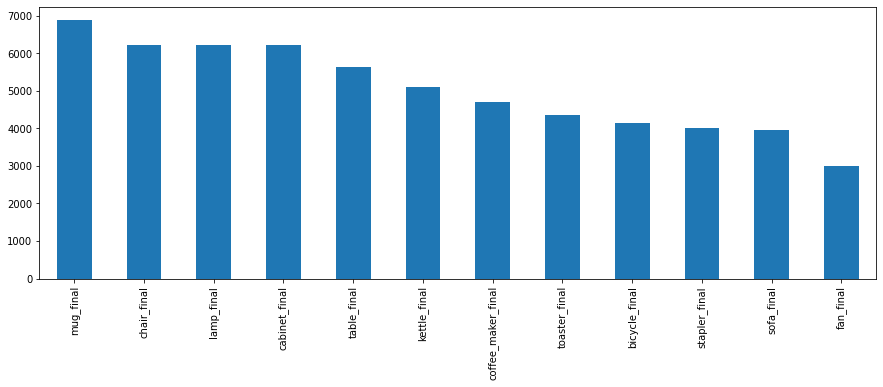

In [28]:
test_df.category.value_counts().plot.bar(figsize=(15, 5))

<AxesSubplot:>

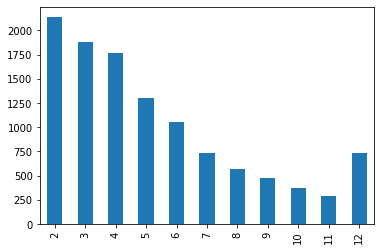

In [29]:
train_df.class_id.value_counts().value_counts().sort_index().plot.bar()

<AxesSubplot:>

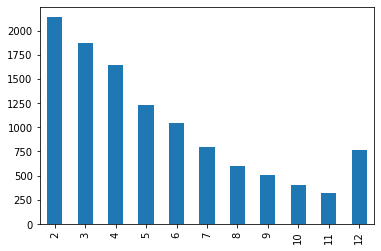

In [30]:
test_df.class_id.value_counts().value_counts().sort_index().plot.bar()

In [31]:
train_df["label"] = train_df.class_id
test_df["label"] = test_df.class_id

In [32]:
train_df.image = "sop/images/" + train_df.image
test_df.image = "sop/images/" + test_df.image

In [33]:
train_df

,id,class_id,super_class_id,image,category,label
0,1,1,1,sop/images/bicycle_final/111085122871_0.JPG,bicycle_final,1
1,2,1,1,sop/images/bicycle_final/111085122871_1.JPG,bicycle_final,1
2,3,1,1,sop/images/bicycle_final/111085122871_2.JPG,bicycle_final,1
3,4,1,1,sop/images/bicycle_final/111085122871_3.JPG,bicycle_final,1
4,5,1,1,sop/images/bicycle_final/111085122871_4.JPG,bicycle_final,1
...,...,...,...,...,...,...
59546,59547,11318,12,sop/images/toaster_final/221852410489_0.JPG,toaster_final,11318
59547,59548,11318,12,sop/images/toaster_final/221852410489_1.JPG,toaster_final,11318
59548,59549,11318,12,sop/images/toaster_final/221852410489_2.JPG,toaster_final,11318
59549,59550,11318,12,sop/images/toaster_final/221852410489_3.JPG,toaster_final,11318


In [34]:
("/data/" + train_df.image).apply(os.path.isfile).value_counts()

True    59551
Name: image, dtype: int64

In [35]:
("/data/" + test_df.image).apply(os.path.isfile).value_counts()

True    60502
Name: image, dtype: int64

In [36]:
train_df.to_parquet(os.path.join(data_dir, "train.parquet"))
test_df.to_parquet(os.path.join(data_dir, "test.parquet"))

train_df.to_parquet("s3://aisle3-ml-datasets/product-matching/sop/train.parquet")
test_df.to_parquet("s3://aisle3-ml-datasets/product-matching/sop/test.parquet")